<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/CFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy.core.fromnumeric import shape
from keras.datasets import cifar10

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

#Onehot encoding convert
from keras.utils import to_categorical 



In [ ]:
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()
#(60000, 28, 28), (60000), (10000,28,28)

170498071/170498071 [==============================] - 6s 0us/step


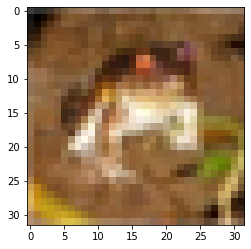

Cai nay la: [6]


In [ ]:
hinh = train_images[0]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print("Cai nay la:", train_labels[0])

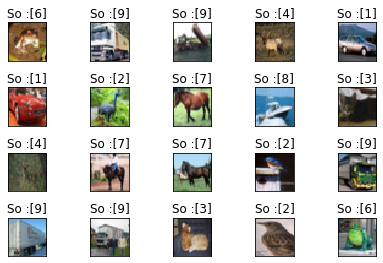

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:

model = Sequential()
model.add(Dense(512, activation= 'relu', input_shape= (32*32*3,))) #Gia tri toi uu
model.add(Dense(10, activation= 'softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_images = train_images.reshape((50000, 32*32*3))
train_images = train_images.astype('float32')/255

In [ ]:
test_images = test_images.reshape((10000, 32*32*3))
test_images = test_images.astype('float32')/255

In [ ]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_labels,epochs= 20, batch_size= 1024)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/20
49/49 [==============================] - 4s 12ms/step - loss: 3.5546 - accuracy: 0.1736
Epoch 2/20
49/49 [==============================] - 1s 13ms/step - loss: 2.1317 - accuracy: 0.2426
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 2.0278 - accuracy: 0.2774
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 1.9507 - accuracy: 0.3056
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 1.9089 - accuracy: 0.3166
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 1.8595 - accuracy: 0.3367
Epoch 7/20
49/49 [==============================] - 1s 11ms/step - loss: 1.8291 - accuracy: 0.3507
Epoch 8/20
49/49 [==============================] - 1s 10ms/step - loss: 1.7953 - accuracy: 0.3643
Epoch 9/20
49/49 [==============================] - 1s 11ms/step - loss: 1.7732 - accuracy: 0.3690
Epoch 10/20
49/49 [==============================] - 1s 11ms/step - loss: 1.7509 - accuracy: 0.3771
Epoch 11/

In [ ]:
model.save('cifar10.h5')

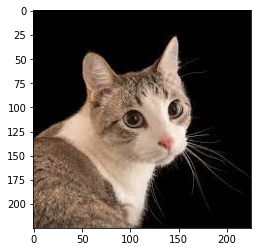

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np

from PIL import Image

img = Image.open('cat.jpg')
imshow(img)


In [ ]:
img = load_img('cat.jpg', target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)

1/1 [==============================] - 0s 82ms/step


array([3])

In [ ]:
#Nhu vay AI da du doan dung tam anh tren